<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#split_data" data-toc-modified-id="split_data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>split_data</a></span><ul class="toc-item"><li><span><a href="#OBP" data-toc-modified-id="OBP-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>OBP</a></span></li><li><span><a href="#SLG" data-toc-modified-id="SLG-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SLG</a></span></li></ul></li></ul></div>

In [44]:
import pandas as pd
import seaborn as sns
plt.rc('font', family='NanumGothic')
import matplotlib.pyplot as plt

In [45]:
def dummy_feature(df, variables):
    dummies = pd.DataFrame()
    for var in variables:
        dummy = pd.get_dummies(df[var], prefix=var, drop_first=True)
        dummies = pd.concat([dummies, dummy], axis=1)
        df = df.drop(var, axis=1)
    df = pd.concat([df, dummies], axis=1)
    return df

def preprocessing_data(data):
    data['height'] = data['height/weight'].apply(lambda x: np.nan if str(x) == 'nan' else x.split('/')[0][:3]).astype(float)
    data['weight'] = data['height/weight'].apply(lambda x: np.nan if str(x) == 'nan' else x.split('/')[1][:-2]).astype(float)
    data['age'] = data.year - data.year_born.apply(lambda x: int(x[:4]))
    data.starting_salary = data.starting_salary.apply(lambda x: x[:-2] if str(x)!='nan' else np.nan).astype(float) 
    
    data = dummy_feature(data, ['team','position'])
    data = data.drop('year_born', axis=1)
    data = data.drop('height/weight', axis=1)
    
    data.starting_salary = data.starting_salary.fillna(np.median(data.starting_salary.dropna()))
    data.height = data.height.fillna(np.median(data.height.dropna()))
    data.weight = data.weight.fillna(np.median(data.weight.dropna()))
    data = data.fillna(0)
    
    return data

In [48]:
data = pd.read_csv('../dataset/Regular_Season_Batter.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2454 entries, 0 to 344
Data columns (total 28 columns):
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non-null int64
height/weight      1652 non-

In [8]:
obp_features = ['year','team','height/weight','year_born','position','starting_salary','OBP']
slg_features = ['year','team','height/weight','year_born','position','starting_salary','SLG']
data_obp = data[obp_features]
data_slg = data[slg_features]

In [9]:
data_obp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2454 entries, 0 to 344
Data columns (total 7 columns):
year               2454 non-null int64
team               2454 non-null object
height/weight      1652 non-null object
year_born          2454 non-null object
position           1652 non-null object
starting_salary    1387 non-null object
OBP                2430 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 153.4+ KB


In [10]:
data_slg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2454 entries, 0 to 344
Data columns (total 7 columns):
year               2454 non-null int64
team               2454 non-null object
height/weight      1652 non-null object
year_born          2454 non-null object
position           1652 non-null object
starting_salary    1387 non-null object
SLG                2428 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 153.4+ KB


In [11]:
data_obp = preprocessing_data(data_obp)
data_slg = preprocessing_data(data_slg)

C:\Users\wogur\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\wogur\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\wogur\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# split_data

In [14]:
x_data_obp = data_obp.drop('OBP',axis=1)
y_data_obp = data_obp.OBP

x_data_slg = data_slg.drop('SLG',axis=1)
y_data_slg = data_slg.SLG

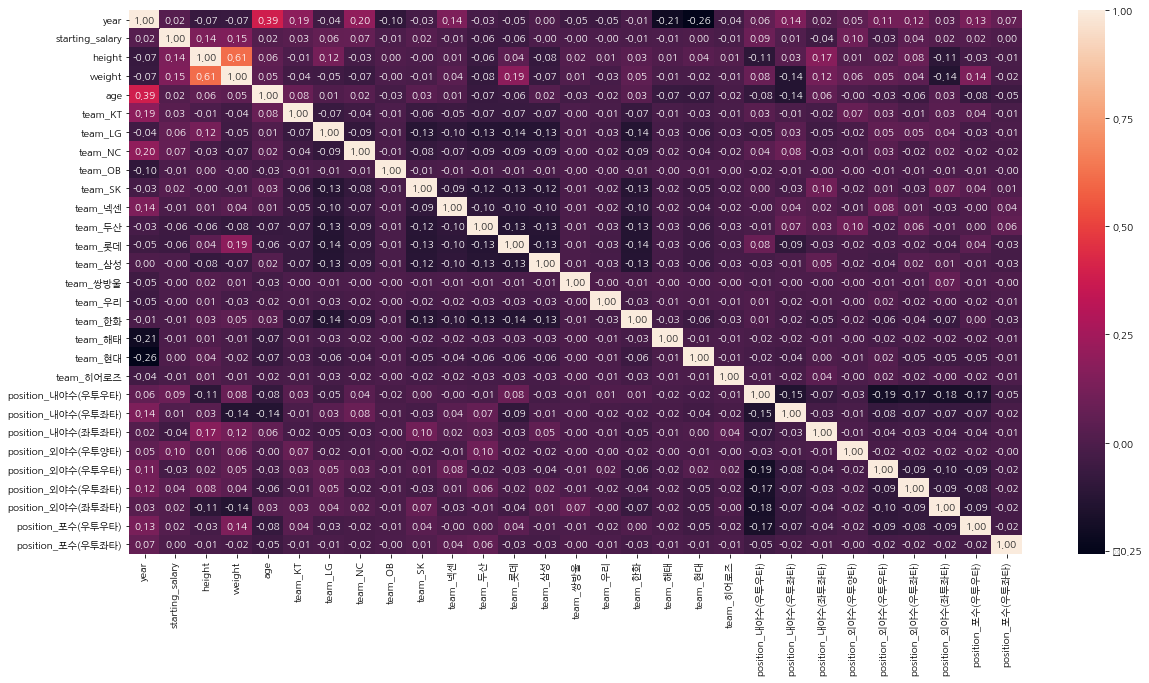

In [24]:
f, ax = plt.subplots(1,1, figsize=(20,10))
sns.heatmap(x_data_obp.corr(), annot=True, fmt=".2f", ax=ax)

In [15]:
x_train_obp = x_data_obp[(x_data_obp.year != 2018) & (x_data_obp.year != 2017)]
x_valid_obp = x_data_obp[x_data_obp.year == 2017]
x_test_obp = x_data_obp[x_data_obp.year == 2018]

y_train_obp = y_data_obp[(x_data_obp.year != 2018) & (x_data_obp.year != 2017)]
y_valid_obp = y_data_obp[x_data_obp.year == 2017]
y_test_obp = y_data_obp[x_data_obp.year == 2018]

x_train_slg = x_data_slg[(x_data_slg.year != 2018) & (x_data_slg.year != 2017)]
x_valid_slg = x_data_slg[x_data_slg.year == 2017]
x_test_slg = x_data_slg[x_data_slg.year == 2018]

y_train_slg = y_data_slg[(x_data_slg.year != 2018) & (x_data_slg.year != 2017)]
y_valid_slg = y_data_slg[x_data_slg.year == 2017]
y_test_slg = y_data_slg[x_data_slg.year == 2018]

In [16]:
x_train_obp = x_train_obp.drop('year', axis=1)
x_valid_obp = x_valid_obp.drop('year', axis=1)
x_test_obp = x_test_obp.drop('year', axis=1)

x_train_slg = x_train_slg.drop('year', axis=1)
x_valid_slg = x_valid_slg.drop('year', axis=1)
x_test_slg = x_test_slg.drop('year', axis=1)

In [17]:
import xgboost as xgb

In [18]:
params = {
    "learning_rate": 0.1,
    "n_estimators": 10000,
    "max_depth": 3,
    "min_child_weight": 5,
    "subsample": 1.0,
    "colsample_bytree": 0.7,
    "colsample_bylevel": 0.7,
    "alpha": 0,
    "lambda": 1,
    "objective": "gpu:reg:linear",
    "tree_method": "gpu_hist",
    "predictor": "gpu_predictor",
    "eval_metric":"rmse"
}
model_obp = xgb.XGBRegressor(**params)
model_slg = xgb.XGBRegressor(**params)

In [19]:
model_obp.fit(x_train_obp, y_train_obp, eval_set=[(x_train_obp, y_train_obp), (x_valid_obp, y_valid_obp)], early_stopping_rounds=100, verbose=50)

[0]	validation_0-rmse:0.212034	validation_1-rmse:0.205062
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.103647	validation_1-rmse:0.093305
[100]	validation_0-rmse:0.100921	validation_1-rmse:0.0934
[150]	validation_0-rmse:0.098914	validation_1-rmse:0.09327
Stopping. Best iteration:
[63]	validation_0-rmse:0.102649	validation_1-rmse:0.093169



XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, eval_metric='rmse', gamma=0, lambda=1,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=10000, n_jobs=1,
       nthread=None, objective='gpu:reg:linear', predictor='gpu_predictor',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0, tree_method='gpu_hist')

In [25]:
model_slg.fit(x_train_slg, y_train_slg, eval_set=[(x_train_slg, y_train_slg), (x_valid_slg, y_valid_slg)], early_stopping_rounds=100, verbose=50)

[0]	validation_0-rmse:0.2246	validation_1-rmse:0.187899
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.148656	validation_1-rmse:0.129211
[100]	validation_0-rmse:0.144398	validation_1-rmse:0.127797
[150]	validation_0-rmse:0.141578	validation_1-rmse:0.126597
[200]	validation_0-rmse:0.139239	validation_1-rmse:0.126489
[250]	validation_0-rmse:0.137691	validation_1-rmse:0.126701
Stopping. Best iteration:
[185]	validation_0-rmse:0.139923	validation_1-rmse:0.126186



XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, eval_metric='rmse', gamma=0, lambda=1,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=10000, n_jobs=1,
       nthread=None, objective='gpu:reg:linear', predictor='gpu_predictor',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0, tree_method='gpu_hist')

In [28]:
print('### OBP')
prob_obp = model_obp.predict(x_test_obp, ntree_limit=model_obp.best_iteration)
rmse = np.sqrt(np.mean(np.power(y_test_obp-prob_obp, 2)))
print('test RMSE: {0:.6f}'.format(rmse))
print()
print('### SLG')
prob_slg = model_slg.predict(x_test_slg, ntree_limit=model_slg.best_iteration)
rmse = np.sqrt(np.mean(np.power(y_test_slg-prob_slg, 2)))
print('test RMSE: {0:.6f}'.format(rmse))

### OBP
test RMSE: 0.109381

### SLG
test RMSE: 0.137139


C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


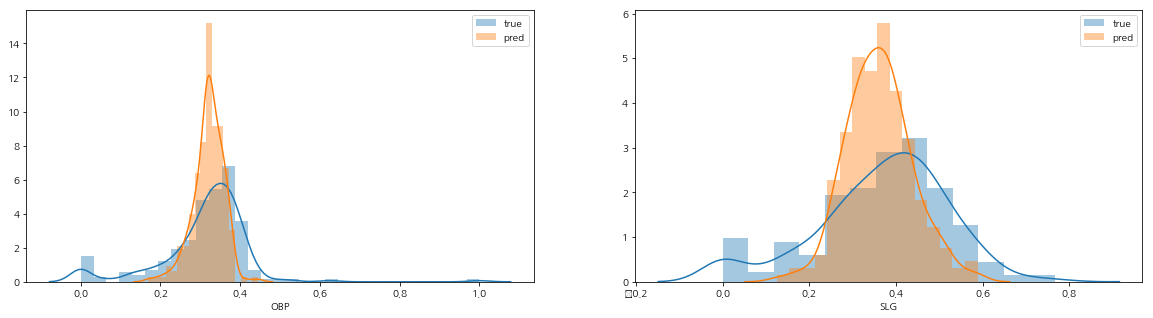

In [31]:
f, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(y_test_obp, label='true', ax=ax[0])
sns.distplot(prob_obp, label='pred', ax=ax[0])
ax[0].legend(loc='upper right')
sns.distplot(y_test_slg, label='true', ax=ax[1])
sns.distplot(prob_slg, label='pred', ax=ax[1])
ax[1].legend(loc='upper right')

## OBP

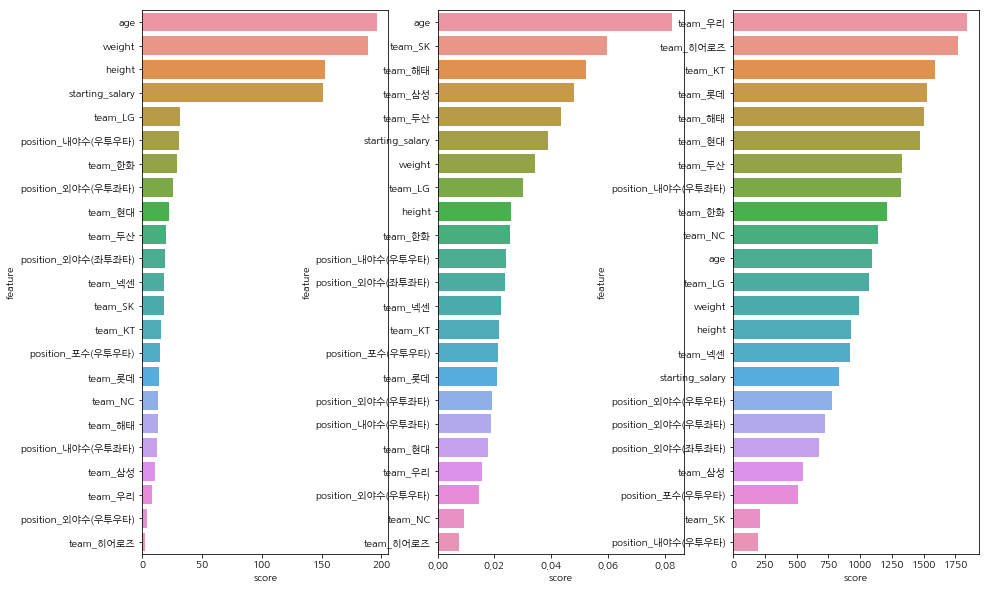

In [37]:
weight_score_obp = model_obp.get_booster().get_score(importance_type='weight')
gain_score_obp = model_obp.get_booster().get_score(importance_type='gain')
cover_score_obp = model_obp.get_booster().get_score(importance_type='cover')

weight_score_df_obp = pd.DataFrame({'feature':list(weight_score_obp.keys()), 'score':list(weight_score_obp.values())})
gain_score_df_obp = pd.DataFrame({'feature':list(gain_score_obp.keys()), 'score':list(gain_score_obp.values())})
cover_score_df_obp = pd.DataFrame({'feature':list(cover_score_obp.keys()), 'score':list(cover_score_obp.values())})

f, ax = plt.subplots(1,3, figsize=(15,10))
sns.barplot(x='score', y='feature', data=weight_score_df_obp.sort_values(by='score', ascending=False), ax=ax[0])
sns.barplot(x='score', y='feature', data=gain_score_df_obp.sort_values(by='score', ascending=False), ax=ax[1])
sns.barplot(x='score', y='feature', data=cover_score_df_obp.sort_values(by='score', ascending=False), ax=ax[2])

## SLG

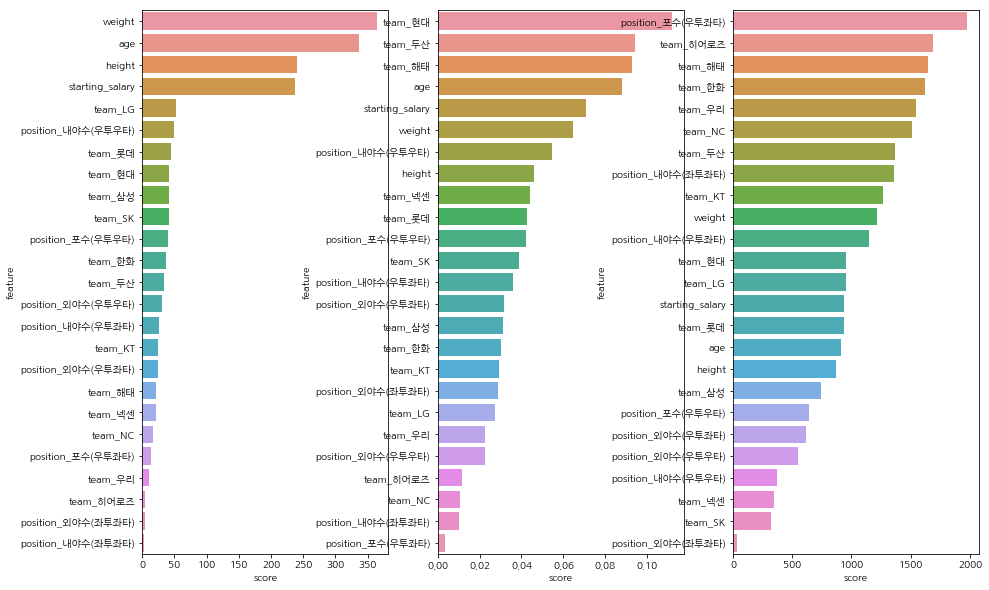

In [38]:
weight_score_slg = model_slg.get_booster().get_score(importance_type='weight')
gain_score_slg = model_slg.get_booster().get_score(importance_type='gain')
cover_score_slg = model_slg.get_booster().get_score(importance_type='cover')

weight_score_df_slg = pd.DataFrame({'feature':list(weight_score_slg.keys()), 'score':list(weight_score_slg.values())})
gain_score_df_slg = pd.DataFrame({'feature':list(gain_score_slg.keys()), 'score':list(gain_score_slg.values())})
cover_score_df_slg = pd.DataFrame({'feature':list(cover_score_slg.keys()), 'score':list(cover_score_slg.values())})

f, ax = plt.subplots(1,3, figsize=(15,10))
sns.barplot(x='score', y='feature', data=weight_score_df_slg.sort_values(by='score', ascending=False), ax=ax[0])
sns.barplot(x='score', y='feature', data=gain_score_df_slg.sort_values(by='score', ascending=False), ax=ax[1])
sns.barplot(x='score', y='feature', data=cover_score_df_slg.sort_values(by='score', ascending=False), ax=ax[2])

test RMSE: 0.228584


C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


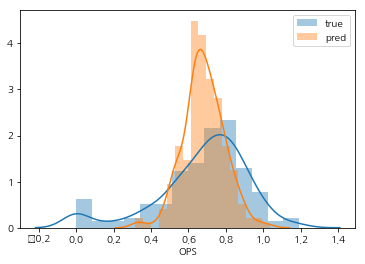

In [49]:
data = preprocessing_data(data)
prob_ops = prob_obp + prob_slg
true_ops = data[data.year == 2018]['OPS']

rmse = np.sqrt(np.mean(np.power(true_ops-prob_ops, 2)))
print('test RMSE: {0:.6f}'.format(rmse))

sns.distplot(true_ops, label='true')
sns.distplot(prob_ops, label='pred')
plt.legend(loc='upper right')